In [2]:
!pip install Ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 15.4 MB/s eta 0:00:00a 0:00:01


In [3]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.2 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.1 MB/s eta 0:00:00


In [4]:
!pip install onnx

In [4]:
import time
from ultralytics import YOLO
import os
import shutil

# Define paths and parameters
yaml_path = "/kaggle/input/accident-no-accident-detection/data.yaml"  # Path to your dataset's .yaml file
project_dir = "/kaggle/working/yolo_project"  # Base project directory
weights_dir = f"{project_dir}/finetune_run/weights"  # Directory for weights
output_dir = "/kaggle/working/weights_backup"  # Persistent storage directory for saved weights
os.makedirs(output_dir, exist_ok=True)  # Ensure the backup directory exists

# Initialize the YOLO model
model = YOLO('yolov8m.pt')  # Load the YOLOv8 pre-trained model

# Train for the first 30 epochs and store results
print("Starting first stage of training (30 epochs)...")
train_results_stage1 = model.train(
    data=yaml_path,
    epochs=30,
    imgsz=640,
    batch=32,
    save_period=5,  # Save weights every 5 epochs
    project=project_dir,
    name="finetune_run"
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 341MB/s]


Starting first stage of training (30 epochs)...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/accident-no-accident-detection/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=/kaggle/working/yolo_project, name=finetune_run, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

100%|██████████| 755k/755k [00:00<00:00, 28.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/accident-no-accident-detection/AN-Data/train/labels... 27707 images, 640 backgrounds, 12 corrupt: 100%|██████████| 27707/27707 [02:04<00:00, 222.81it/s]

train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15499.jpg: ignoring corrupt image/label: negative label values [  -0.003684]
train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15501.jpg: ignoring corrupt image/label: negative label values [   -0.19162    -0.13495]
train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15504.jpg: ignoring corrupt image/label: negative label values [   -0.19484    -0.13721]
train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15505.jpg: ignoring corrupt image/label: negative label values [   -0.19346    -0.17297]
train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15507.jpg: ignoring corrupt image/label: negative label values [  -0.036738    -0.19371]
train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15508.jpg: ignoring corrupt image/label: negative label values 

train: WARNING ⚠️ Cache directory /kaggle/input/accident-no-accident-detection/AN-Data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/accident-no-accident-detection/AN-Data/valid/labels... 3787 images, 86 backgrounds, 0 corrupt: 100%|██████████| 3787/3787 [00:16<00:00, 230.63it/s]

val: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/valid/images/3672.jpg: 13 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/valid/images/3674.jpg: 9 duplicate labels removed


val: WARNING ⚠️ Cache directory /kaggle/input/accident-no-accident-detection/AN-Data/valid is not writeable, cache not saved.
Plotting labels to /kaggle/working/yolo_project/finetune_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/yolo_project/finetune_run
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      14.2G      1.242      1.398      1.329         48        640: 100%|██████████| 866/866 [16:44<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:59<00:00,  1.02it/s]


                   all       3787       9212      0.651      0.633      0.653      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      14.5G      1.141     0.9945      1.261         85        640: 100%|██████████| 866/866 [16:52<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.03it/s]


                   all       3787       9212      0.686      0.671      0.711      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      14.2G      1.209      1.091      1.307         70        640: 100%|██████████| 866/866 [16:48<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:58<00:00,  1.03it/s]


                   all       3787       9212      0.551       0.55      0.537      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      14.1G      1.262      1.169       1.35         43        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.681      0.639      0.679      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30        13G      1.196       1.06      1.316         52        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:58<00:00,  1.03it/s]


                   all       3787       9212      0.727      0.678       0.73      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      13.6G      1.143     0.9788      1.284         49        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.03it/s]


                   all       3787       9212      0.748      0.698      0.755      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      13.4G      1.101     0.9125      1.254         67        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:58<00:00,  1.03it/s]


                   all       3787       9212      0.778       0.75      0.815      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      13.9G      1.071     0.8694      1.237         53        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.782      0.758      0.826      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      13.2G      1.044     0.8294      1.219         45        640: 100%|██████████| 866/866 [16:47<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.804      0.791      0.847      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      13.1G      1.016     0.7971      1.205         52        640: 100%|██████████| 866/866 [16:47<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.819      0.794      0.857      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      13.5G     0.9948     0.7661      1.189        148        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.833       0.81       0.87      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      14.1G     0.9691      0.738      1.174        115        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.843      0.816      0.881      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      14.1G     0.9491     0.7167      1.162         34        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.847      0.822      0.889      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      14.1G     0.9313     0.6908      1.151         54        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.848      0.835      0.893       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      13.6G     0.9169     0.6752       1.14         62        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.862      0.839      0.901      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      15.1G     0.9054     0.6585      1.131         62        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.868      0.848      0.905      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      14.2G     0.8782     0.6376       1.12         68        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:58<00:00,  1.03it/s]


                   all       3787       9212      0.867      0.851      0.908      0.707

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      13.6G      0.865     0.6224      1.111         68        640: 100%|██████████| 866/866 [16:48<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212       0.87      0.851      0.911      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      13.6G     0.8448     0.6029      1.101         56        640: 100%|██████████| 866/866 [16:48<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.873      0.857      0.913       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      13.7G     0.8275     0.5912      1.089         77        640: 100%|██████████| 866/866 [16:49<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.877      0.858      0.915      0.726
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      13.2G     0.7723     0.4914      1.061         26        640: 100%|██████████| 866/866 [16:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.877      0.862      0.918      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      13.5G     0.7467      0.471      1.045         44        640: 100%|██████████| 866/866 [16:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.884      0.861      0.918      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      13.6G     0.7275     0.4545      1.031         17        640: 100%|██████████| 866/866 [16:43<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.883      0.866       0.92      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      13.5G     0.7068     0.4381      1.019         36        640: 100%|██████████| 866/866 [16:45<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.885      0.867      0.921      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      14.1G     0.6892     0.4256      1.011         41        640: 100%|██████████| 866/866 [16:43<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.889      0.865      0.922      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30        13G      0.671     0.4106     0.9959         23        640: 100%|██████████| 866/866 [16:44<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.892      0.868      0.923      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      13.5G     0.6507      0.396     0.9837         40        640: 100%|██████████| 866/866 [16:44<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.897      0.862      0.922      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30        13G     0.6349     0.3849     0.9762         34        640: 100%|██████████| 866/866 [16:43<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.892      0.866      0.922      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30        13G     0.6184      0.371     0.9659         44        640: 100%|██████████| 866/866 [16:44<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.898      0.861      0.922      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30        14G     0.6027     0.3603      0.957         33        640: 100%|██████████| 866/866 [16:44<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.896      0.863      0.922      0.766

30 epochs completed in 8.886 hours.
Optimizer stripped from /kaggle/working/yolo_project/finetune_run/weights/last.pt, 52.0MB
Optimizer stripped from /kaggle/working/yolo_project/finetune_run/weights/best.pt, 52.0MB

Validating /kaggle/working/yolo_project/finetune_run/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [01:01<00:00,  1.02s/it]


                   all       3787       9212      0.895      0.863      0.922      0.766
              Accident       1993       2193      0.926       0.95      0.978      0.824
          Non Accident       1843       7019      0.864      0.776      0.866      0.707
Speed: 0.2ms preprocess, 12.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /kaggle/working/yolo_project/finetune_run


In [2]:
from ultralytics import YOLO

# Load the model
model = YOLO("/kaggle/working/yolo_project/finetune_run/weights/best.pt")  # Replace with your model file

# Run inference on an image
results = model.predict(source="/kaggle/input/accident-no-accident-detection/AN-Data/test/images/1005.jpg", save=True, save_txt=True)

# Output results
print(results) 


image 1/1 /kaggle/input/accident-no-accident-detection/AN-Data/test/images/1005.jpg: 640x640 2 Accidents, 37.0ms
Speed: 3.1ms preprocess, 37.0ms inference, 184.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
1 label saved to runs/detect/predict2/labels
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Accident', 1: 'Non Accident'}
obb: None
orig_img: array([[[253, 255, 236],
        [253, 255, 236],
        [241, 243, 224],
        ...,
        [ 27,  41,  30],
        [ 28,  42,  31],
        [ 26,  40,  29]],

       [[244, 246, 227],
        [255, 255, 241],
        [255, 255, 242],
        ...,
        [ 27,  41,  30],
        [ 27,  41,  30],
        [ 26,  40,  29]],

       [[254, 255, 237],
        [255, 255, 240],
        [241, 243, 224],
        ...,
        [ 25,  39,  28],
        [ 25,  39,  28],
        [ 24,  38,  27]],

       ...,

In [5]:
import time
from ultralytics import YOLO
import os
import shutil

# Define paths and parameters
yaml_path = "/kaggle/input/accident-no-accident-detection/data.yaml"  # Path to your dataset's .yaml file
project_dir = "/kaggle/working/yolo_project"  # Base project directory
weights_dir = f"{project_dir}/finetune_run/weights"  # Directory for weights
output_dir = "/kaggle/working/weights_backup"  # Persistent storage directory for saved weights
os.makedirs(output_dir, exist_ok=True)  # Ensure the backup directory exists

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
# Load the last saved weights
last_weights_path = "/kaggle/input/yolov8/pytorch/default/1/last.pt"  # Path to the last weights
if os.path.exists(last_weights_path):
    print(f"Loading weights from {last_weights_path}...")
    model = YOLO(last_weights_path)
else:
    print("No last.pt file found. Ensure weights were saved correctly.")

# Continue training for the remaining 20 epochs and store results
print("Starting second stage of training (20 epochs)...")
train_results_stage2 = model.train(
    data=yaml_path,
    epochs=20,  # Remaining epochs
    imgsz=640,
    batch=32,
    save_period=5,
    project=project_dir,
    name="finetune_run_continued"
)

Loading weights from /kaggle/input/yolov8/pytorch/default/1/last.pt...
Starting second stage of training (20 epochs)...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/yolov8/pytorch/default/1/last.pt, data=/kaggle/input/accident-no-accident-detection/data.yaml, epochs=20, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=/kaggle/working/yolo_project, name=finetune_run_continued, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False,

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.7MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/accident-no-accident-detection/AN-Data/train/labels... 27707 images, 640 backgrounds, 12 corrupt: 100%|██████████| 27707/27707 [03:25<00:00, 134.73it/s]

train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15499.jpg: ignoring corrupt image/label: negative label values [  -0.003684]
train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15501.jpg: ignoring corrupt image/label: negative label values [   -0.19162    -0.13495]
train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15504.jpg: ignoring corrupt image/label: negative label values [   -0.19484    -0.13721]
train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15505.jpg: ignoring corrupt image/label: negative label values [   -0.19346    -0.17297]
train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15507.jpg: ignoring corrupt image/label: negative label values [  -0.036738    -0.19371]
train: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/train/images/15508.jpg: ignoring corrupt image/label: negative label values 

train: WARNING ⚠️ Cache directory /kaggle/input/accident-no-accident-detection/AN-Data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/accident-no-accident-detection/AN-Data/valid/labels... 3787 images, 86 backgrounds, 0 corrupt: 100%|██████████| 3787/3787 [00:27<00:00, 139.22it/s]

val: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/valid/images/3672.jpg: 13 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/valid/images/3674.jpg: 9 duplicate labels removed


val: WARNING ⚠️ Cache directory /kaggle/input/accident-no-accident-detection/AN-Data/valid is not writeable, cache not saved.
Plotting labels to /kaggle/working/yolo_project/finetune_run_continued/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/yolo_project/finetune_run_continued
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      14.2G     0.8735     0.6646      1.125         48        640: 100%|██████████| 866/866 [15:43<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:55<00:00,  1.08it/s]


                   all       3787       9212      0.694      0.692       0.72      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      14.6G      1.071     0.8964      1.251         85        640: 100%|██████████| 866/866 [15:41<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:54<00:00,  1.11it/s]


                   all       3787       9212      0.735      0.705      0.765      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      14.4G      1.086     0.9142      1.259         70        640: 100%|██████████| 866/866 [15:36<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


                   all       3787       9212      0.701      0.653      0.699      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      14.2G      1.076     0.8908      1.253         43        640: 100%|██████████| 866/866 [15:35<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


                   all       3787       9212      0.793      0.759      0.824      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      13.1G      1.032     0.8271      1.228         52        640: 100%|██████████| 866/866 [15:35<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.11it/s]


                   all       3787       9212      0.795      0.755      0.825      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      13.7G     0.9931     0.7824      1.201         49        640: 100%|██████████| 866/866 [15:34<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.11it/s]


                   all       3787       9212      0.809      0.777      0.844      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      13.5G     0.9535     0.7311      1.177         67        640: 100%|██████████| 866/866 [15:35<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.11it/s]


                   all       3787       9212      0.842       0.79      0.867      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20        14G     0.9315     0.7076      1.164         53        640: 100%|██████████| 866/866 [15:35<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


                   all       3787       9212      0.848      0.806      0.877      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      13.4G     0.9067     0.6772      1.144         45        640: 100%|██████████| 866/866 [15:35<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


                   all       3787       9212      0.835      0.827      0.886      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      13.2G     0.8803     0.6546      1.133         52        640: 100%|██████████| 866/866 [15:35<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


                   all       3787       9212      0.855      0.832      0.888      0.671
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      13.7G     0.8247      0.537      1.105         26        640: 100%|██████████| 866/866 [15:30<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:54<00:00,  1.11it/s]


                   all       3787       9212      0.875      0.827        0.9      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      13.1G     0.7885     0.5103      1.082         41        640: 100%|██████████| 866/866 [15:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.11it/s]


                   all       3787       9212      0.879      0.846       0.91      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      13.6G     0.7638     0.4893      1.062         36        640: 100%|██████████| 866/866 [15:28<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


                   all       3787       9212      0.876      0.846      0.909      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      13.2G     0.7368     0.4673      1.047         29        640: 100%|██████████| 866/866 [15:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.11it/s]


                   all       3787       9212      0.897      0.845      0.916      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      13.6G     0.7156     0.4502      1.032         42        640: 100%|██████████| 866/866 [15:26<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.13it/s]


                   all       3787       9212      0.878      0.857      0.915      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      13.6G     0.6862     0.4255      1.009         65        640: 100%|██████████| 866/866 [15:26<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


                   all       3787       9212       0.89      0.851      0.917      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      13.7G     0.6687     0.4119          1         39        640: 100%|██████████| 866/866 [15:27<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


                   all       3787       9212      0.896      0.858       0.92      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      13.6G     0.6486     0.3956     0.9887         34        640: 100%|██████████| 866/866 [15:26<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.11it/s]


                   all       3787       9212        0.9       0.86       0.92      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      13.7G     0.6309     0.3822     0.9774         22        640: 100%|██████████| 866/866 [15:26<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


                   all       3787       9212      0.901      0.864      0.921      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      13.8G     0.6079     0.3675     0.9636         28        640: 100%|██████████| 866/866 [15:26<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:53<00:00,  1.12it/s]


                   all       3787       9212      0.903      0.863      0.922      0.765

20 epochs completed in 5.489 hours.
Optimizer stripped from /kaggle/working/yolo_project/finetune_run_continued/weights/last.pt, 52.0MB
Optimizer stripped from /kaggle/working/yolo_project/finetune_run_continued/weights/best.pt, 52.0MB

Validating /kaggle/working/yolo_project/finetune_run_continued/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:57<00:00,  1.04it/s]


                   all       3787       9212      0.903      0.863      0.922      0.765
              Accident       1993       2193      0.943      0.953      0.979      0.827
          Non Accident       1843       7019      0.863      0.774      0.864      0.703
Speed: 0.2ms preprocess, 11.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /kaggle/working/yolo_project/finetune_run_continued


In [ ]:
# Backup the final weights
weights_dir="/kaggle/working/yolo_project/finetune_run_continued"
if os.path.exists(weights_dir):
    for file in os.listdir(weights_dir):
        if file.endswith('.pt'):
            shutil.copy(os.path.join(weights_dir, file), output_dir)
            if file == 'best.pt': 
                onnx_path = os.path.join(output_dir, 'best.onnx')
                print(f"Exporting {file} to ONNX format at {onnx_path}...")
                model.export(format='onnx', weights=os.path.join(output_dir, file))
    print(f"Final weights and ONNX model saved to {output_dir}")
else:
    print("Weights directory not found. Check if training completed correctly.")

In [9]:
# Load the fine-tuned YOLO model
model = YOLO('/kaggle/working/yolo_project/finetune_run_continued/weights/best.pt')
model.export(format='onnx')

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/kaggle/working/yolo_project/finetune_run_continued/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (49.6 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.45...
ONNX: export success ✅ 2.9s, saved as '/kaggle/working/yolo_project/finetune_run_continued/weights/best.onnx' (98.8 MB)

Export complete (4.8s)
Results saved to /kaggle/working/yolo_project/finetune_run_continued/weights
Predict:         yolo predict task=detect model=/kaggle/working/yolo_project/finetune_run_continued/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/yolo_project/finetune_run_continued/weights/best.onnx imgsz=640 data=/kaggle/input/accident-no-accident-detection/data.yaml  
Visualize:       https://netron.ap

'/kaggle/working/yolo_project/finetune_run_continued/weights/best.onnx'

In [11]:
import onnx
onnx_model = onnx.load('/kaggle/working/yolo_project/finetune_run_continued/weights/best.onnx')
onnx.checker.check_model(onnx_model)
print("ONNX model exported and validated successfully!")

ONNX model exported and validated successfully!


In [12]:
model=YOLO("/kaggle/input/yolov8/pytorch/default/2/best.pt")

In [13]:
metrics=model.val()
print(metrics)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/input/accident-no-accident-detection/AN-Data/valid/labels... 3787 images, 86 backgrounds, 0 corrupt: 100%|██████████| 3787/3787 [00:08<00:00, 465.75it/s]

val: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/valid/images/3672.jpg: 13 duplicate labels removed
val: WARNING ⚠️ /kaggle/input/accident-no-accident-detection/AN-Data/valid/images/3674.jpg: 9 duplicate labels removed


val: WARNING ⚠️ Cache directory /kaggle/input/accident-no-accident-detection/AN-Data/valid is not writeable, cache not saved.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 237/237 [01:44<00:00,  2.28it/s]


                   all       3787       9212      0.901      0.866      0.922      0.765
              Accident       1993       2193      0.942      0.954      0.979      0.827
          Non Accident       1843       7019       0.86      0.779      0.865      0.704
Speed: 0.2ms preprocess, 23.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d21b7861c00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0

In [16]:
# Run inference on an image
results = model.predict(source="/kaggle/input/accident-no-accident-detection/AN-Data/test/images/1050.jpg", save=True, save_txt=True)

# Output results
print(results) 


image 1/1 /kaggle/input/accident-no-accident-detection/AN-Data/test/images/1050.jpg: 640x640 2 Non Accidents, 37.1ms
Speed: 2.6ms preprocess, 37.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
2 labels saved to runs/detect/predict/labels
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Accident', 1: 'Non Accident'}
obb: None
orig_img: array([[[11,  7,  6],
        [12,  8,  7],
        [12,  8,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[11,  7,  6],
        [12,  8,  7],
        [12,  8,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[11,  7,  6],
        [12,  8,  7],
        [12,  8,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 3, 30, 26],
        [ 3, 30, 26],
       

In [22]:
!pip install opencv-python-headless

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()



0: 480x640 (no detections), 51.1ms
Speed: 1.4ms preprocess, 51.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


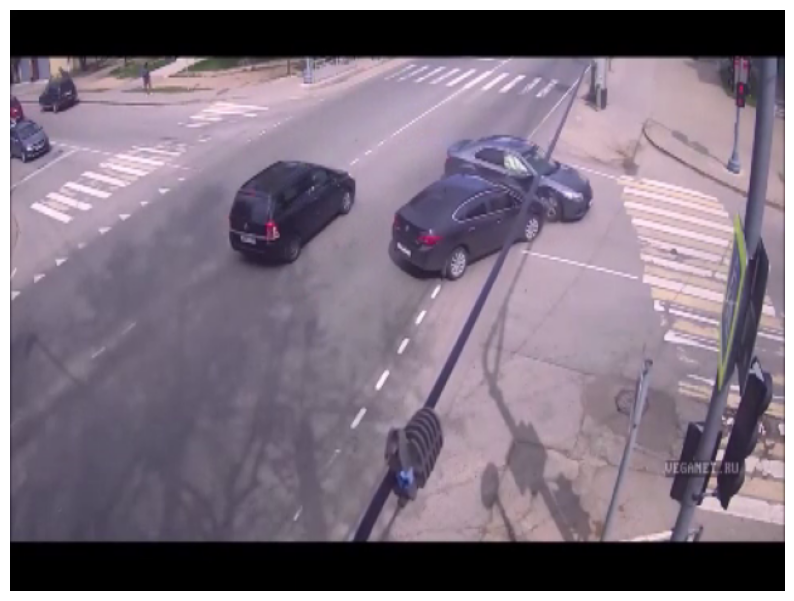


0: 480x640 (no detections), 28.3ms
Speed: 1.7ms preprocess, 28.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


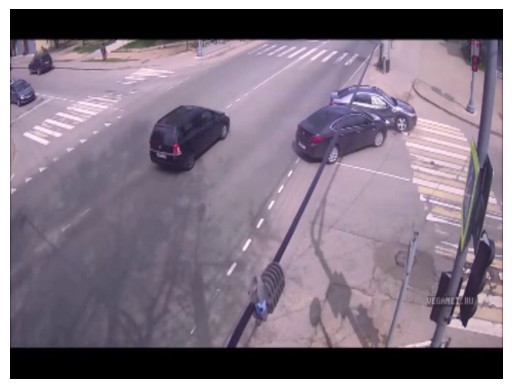


0: 480x640 1 Accident, 1 Non Accident, 28.3ms
Speed: 1.7ms preprocess, 28.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


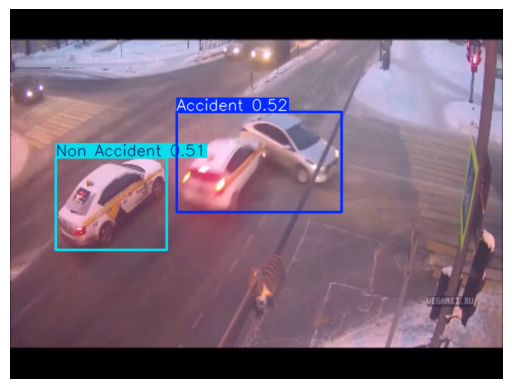

In [5]:
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLO model
model = YOLO('/kaggle/input/yolov8/pytorch/default/2/best.pt')

# Open the video file
cap = cv2.VideoCapture("/kaggle/input/videos/crrr.mp4")

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error: Cannot open video file.")
    exit()

# Get video frame rate (frames per second)
fps = cap.get(cv2.CAP_PROP_FPS)  # Frames per second
frame_interval = int(fps)  # Process one frame every second

# Initialize a frame counter
frame_count = 0

# Set up matplotlib figure
plt.figure(figsize=(10, 8))

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Exit loop if no more frames

    frame_count += 1

    # Resize the frame to reduce memory usage (optional)
    frame_resized = cv2.resize(frame, (640, 480))  # Resize to 640x480 or smaller

    # Process the frame if it's the right interval (every second)
    if frame_count % frame_interval == 0:
        # Run YOLO model on the frame
        results = model(frame_resized)

        # Annotate the frame with detection results
        annotated_frame = results[0].plot()

        # Convert BGR to RGB for matplotlib
        annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

        # Display the annotated frame using matplotlib
        plt.imshow(annotated_frame_rgb)
        plt.axis('off')  # Hide axes
        plt.show(block=False)
        plt.pause(0.1)  # Adjust the pause to control frame rate

        # Optionally save the frame with annotations
        # plt.savefig(f"frame_{frame_count}.jpg")

        # Release GPU memory (if applicable)
        torch.cuda.empty_cache()

    # Exit on pressing 'q' (not applicable in matplotlib window, exit on loop finish)
    if frame_count >= 100:  # Arbitrary stop condition for testing
        break

# Release the video capture object
cap.release()
plt.close()  # Close the matplotlib window
